In [29]:
root_dir = "./exp1_model_metrics_avg.csv"
exp_name = "exp1"

In [30]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

In [31]:
if exp_name == "exp1":
    model_info = {
        'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
        'Random Forest': {'color': "tomato", 'marker': "s"},
        'Linear Regression': {'color': "gold", 'marker': "^"},
        'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
        'Decision Tree Regressor': {'color': "lightcoral", 'marker': "p"},
        'MLP Regressor': {'color': "mediumorchid", 'marker': "X"},
        'Passive Aggressive (PA)': {'color': "lightpink", 'marker': "s"},
        'K-Neighbors Regressor': {'color': "deepskyblue", 'marker': "^"},
        'Support Vector Regressor (SVR)': {'color': "limegreen", 'marker': "+"},
        'Linear Regression (LR)': {'color': "salmon", 'marker': "P"},
        'LSTM with Attention': {'color': "orchid", 'marker': "*"},
        'GRU': {'color': "slateblue", 'marker': "v"},
        'BI-LSTM': {'color': "darkorange", 'marker': "d"},
        'LSTM': {'color': "lightseagreen", 'marker': "*"},
        'SGD Regressor': {'color': "violet", 'marker': "h"}
    }
else:
    model_info = {
    'XGBoost Regressor': {'color': "dodgerblue", 'marker': "o"},
    'Ada Boost Regressor': {'color': "mediumseagreen", 'marker': "D"},
    'Passive Aggressive (PA)': {'color': "lightpink", 'marker': "s"},
    'SGD Regressor': {'color': "violet", 'marker': "h"},
    'Adaptive Random Forest (ARF)': {'color': "tomato", 'marker': "s"},
    'Hoeffding Adaptive Tree Regressor': {'color': "gold", 'marker': "^"},
    'Hoeffding Tree Regressor': {'color': "skyblue", 'marker': "o"},
    'SRP Regressor': {'color': "deepskyblue", 'marker': "^"},
    'MLP partialfit': {'color': "mediumorchid", 'marker': "X"}
    }

In [32]:
df = pd.read_csv(root_dir,index_col=False)
df

,Model,Window Size,MAE_mean,MAE_std,RMSE_mean,RMSE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training Time,Inference Time,Model memory (MB)
0,Ada Boost Regressor,6,8.934,0.230,12.349,0.241,32.746,0.628,0.831,0.007,2.308,0.060,0.352,0.003,0.013
1,Ada Boost Regressor,9,8.901,0.238,12.381,0.300,32.669,0.635,0.831,0.008,2.300,0.061,0.449,0.003,0.013
2,Ada Boost Regressor,12,9.248,0.172,12.953,0.162,33.394,0.434,0.815,0.005,2.388,0.044,0.734,0.004,0.015
3,Ada Boost Regressor,20,10.335,1.807,14.293,2.185,35.367,3.249,0.770,0.075,2.668,0.466,1.150,0.004,0.015
4,Ada Boost Regressor,32,9.600,0.977,13.701,1.189,34.324,1.799,0.792,0.039,2.476,0.252,1.645,0.005,0.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,XGBoost Regressor,9,3.913,0.091,9.447,0.104,22.287,0.447,0.901,0.002,1.011,0.024,0.110,0.002,0.004
68,XGBoost Regressor,12,3.964,0.104,9.457,0.101,22.384,0.531,0.901,0.002,1.024,0.027,0.123,0.002,0.004
69,XGBoost Regressor,20,4.043,0.106,9.484,0.106,22.889,0.573,0.901,0.002,1.044,0.027,0.158,0.002,0.004
70,XGBoost Regressor,32,4.179,0.103,9.555,0.116,23.398,0.397,0.899,0.002,1.078,0.027,0.198,0.003,0.004


In [33]:
df.Model.unique()

array(['Ada Boost Regressor', 'BI-LSTM', 'Decision Tree Regressor', 'GRU',
       'LSTM', 'LSTM with Attention', 'Linear Regression (LR)',
       'Passive Aggressive (PA)', 'Random Forest', 'SGD Regressor',
       'Support Vector Regressor (SVR)', 'XGBoost Regressor'],
      dtype=object)

In [34]:
df[df.Model=='BI-LSTM']

,Model,Window Size,MAE_mean,MAE_std,RMSE_mean,RMSE_std,SMAPE_mean,SMAPE_std,r2_mean,r2_std,MASE_mean,MASE_std,Training Time,Inference Time,Model memory (MB)
6,BI-LSTM,6,3.284,0.046,7.444,0.077,19.786,0.534,0.939,0.001,0.849,0.012,279.890,0.177,0.131
7,BI-LSTM,9,3.285,0.046,7.445,0.077,19.790,0.536,0.939,0.001,0.849,0.012,359.158,0.259,0.131
8,BI-LSTM,12,3.285,0.045,7.447,0.077,19.794,0.538,0.939,0.001,0.848,0.012,409.351,0.257,0.131
9,BI-LSTM,20,3.288,0.045,7.452,0.077,19.815,0.533,0.939,0.001,0.849,0.012,529.120,0.578,0.131
10,BI-LSTM,32,3.291,0.046,7.457,0.077,19.840,0.533,0.939,0.001,0.849,0.012,714.737,0.772,0.131
11,BI-LSTM,64,3.294,0.045,7.461,0.077,19.890,0.523,0.939,0.001,0.851,0.012,978.507,1.051,0.131


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.legend_handler import HandlerBase

def plot_and_save(df_local, column_name,exp_name):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True) 

    plt.subplots_adjust(hspace=0.5)  

    class MarkerHandler(HandlerBase):
        def create_artists(self, legend, tup, xdescent, ydescent,
                           width, height, fontsize, trans):
            return [tup]

    scatter_handles = {} 

    for i, (col, ax) in enumerate(zip(df_local["Window Size"], axs.flatten())):

        df_temp = df[df['Window Size'] == col].reset_index(drop=True)
        categories = np.random.choice(len(model_info), len(df_temp))
        for index, row in df_temp.iterrows():
            model_info_entry = model_info[row['Model']]
            color = model_info_entry['color']
            marker = model_info_entry['marker']

            handle = ax.scatter(row['MAE_mean'], row[column_name], color=color, marker=marker, label=row['Model'], s=50)
            if i == 0:
                scatter_handles[row['Model']] = handle

        ax.set_title(f"Window Size {col}", fontsize=20) 
        ax.set_yscale('log')  
        ax.set_xlabel('MAE', fontsize=14)  # Set x-axis label with font size 14
        ax.set_ylabel(f'{column_name} (log scale)', fontsize=18)  # Set y-axis label with font size 14

        x = [0, 1, 2, 3, 4, 5, 6.5, 8, 10, 15, 20, 25]
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.set_xlim([0, 30])
        ax.grid(True)  

    plt.subplots_adjust(right=0.85) 

    fig.legend(handles=scatter_handles.values(), labels=scatter_handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, handler_map={plt.scatter: MarkerHandler()})
    plt.tight_layout()
    
    viz_folder = f"images/"
    os.makedirs(viz_folder, exist_ok=True)
    # plt.savefig(f"images/{column_name}_plot_{exp_name}.pdf", bbox_inches='tight', dpi=300)  
    plt.savefig(f'images/{column_name}_plot_{exp_name}.svg')

filter_values = [6, 32, 64]

df = df[df['Window Size'].isin(filter_values)]

hue_order_learner = sorted(df['Window Size'].unique())

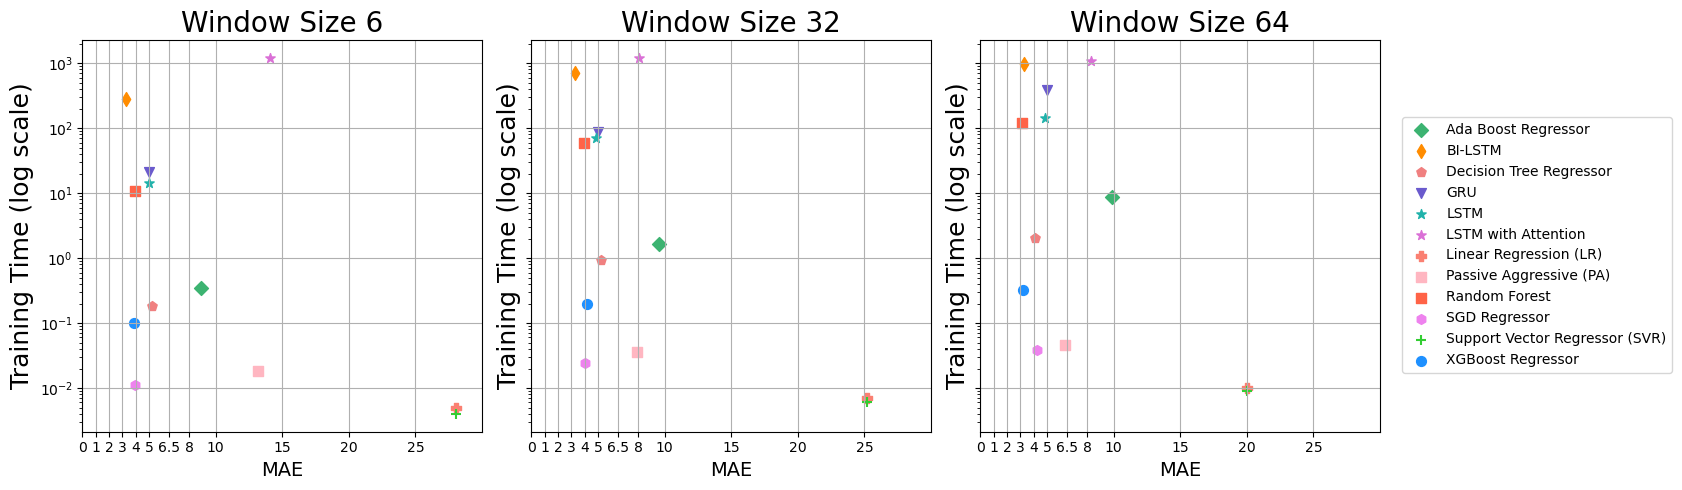

In [36]:
plot_and_save(df, "Training Time", exp_name)

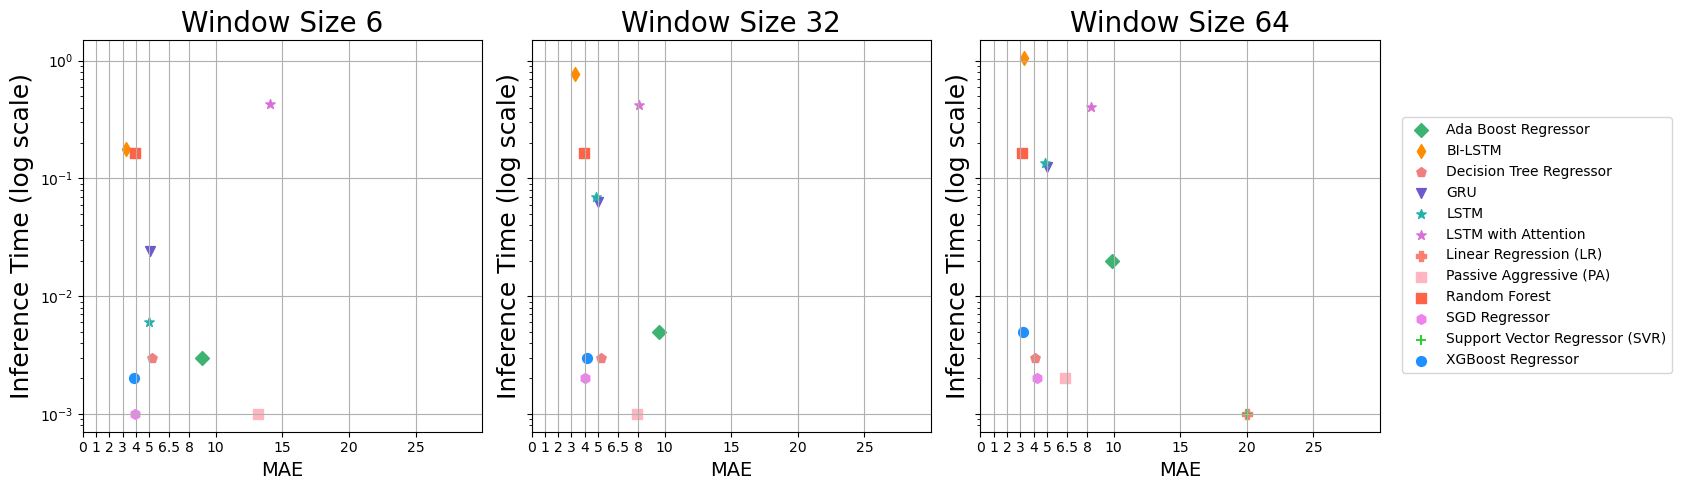

In [37]:
if exp_name == "exp1":
    plot_and_save(df, "Inference Time",exp_name)
elif exp_name == "exp2":
    df.rename(columns={'Inference Time': 'Evaluation Time'}, inplace=True)
    plot_and_save(df, "Evaluation Time",exp_name)

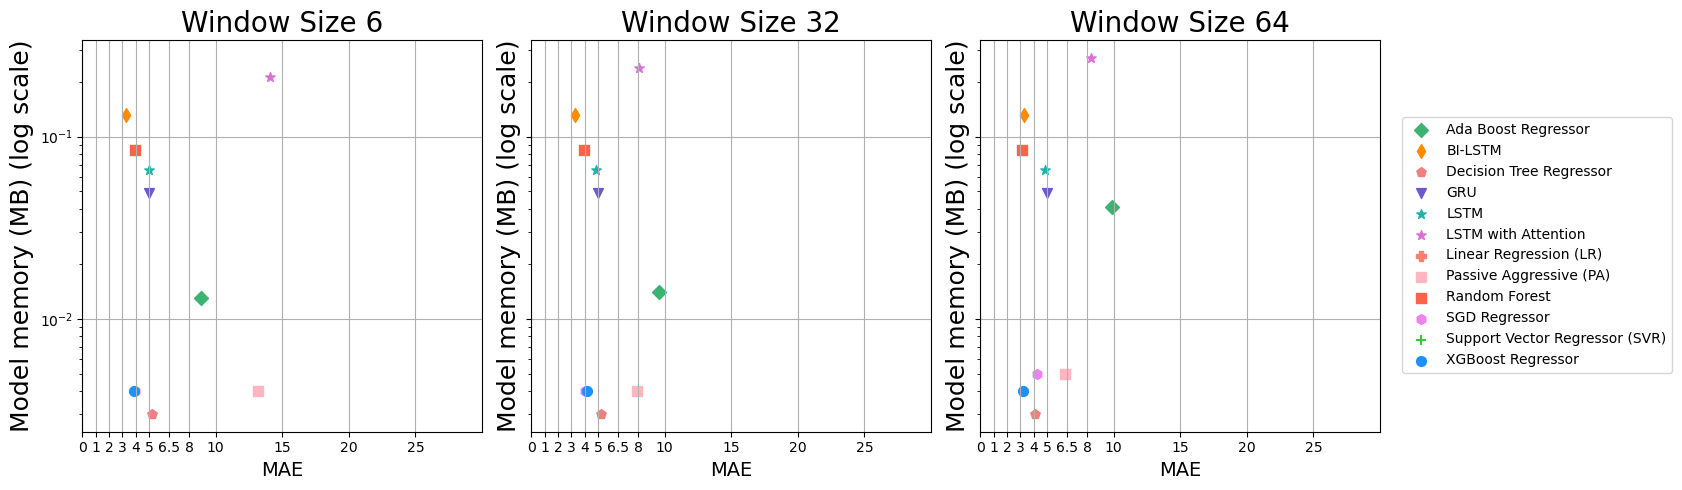

In [38]:
plot_and_save(df, "Model memory (MB)",exp_name)